In [2]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [5]:
# 파일경로 통해서 데이터프레임 생성
path = "./data/scalp_type/"
dataset = {"image_path": [], "scalp_type": [], "where": []}

for where in os.listdir(path):
    for status in os.listdir(path + where):
        for image in glob.glob(path + where + "/" + status + "/*.jpg"):
            dataset["image_path"].append(image)
            dataset["scalp_type"].append(status)
            dataset["where"].append(where)


In [6]:
dataset = pd.DataFrame(dataset)
dataset.tail()

,image_path,scalp_type,where
5283,./data/scalp_type/Validation02/Hair_loss_3\924...,Hair_loss_3,Validation02
5284,./data/scalp_type/Validation02/Hair_loss_3\933...,Hair_loss_3,Validation02
5285,./data/scalp_type/Validation02/Hair_loss_3\952...,Hair_loss_3,Validation02
5286,./data/scalp_type/Validation02/Hair_loss_3\952...,Hair_loss_3,Validation02
5287,./data/scalp_type/Validation02/Hair_loss_3\957...,Hair_loss_3,Validation02


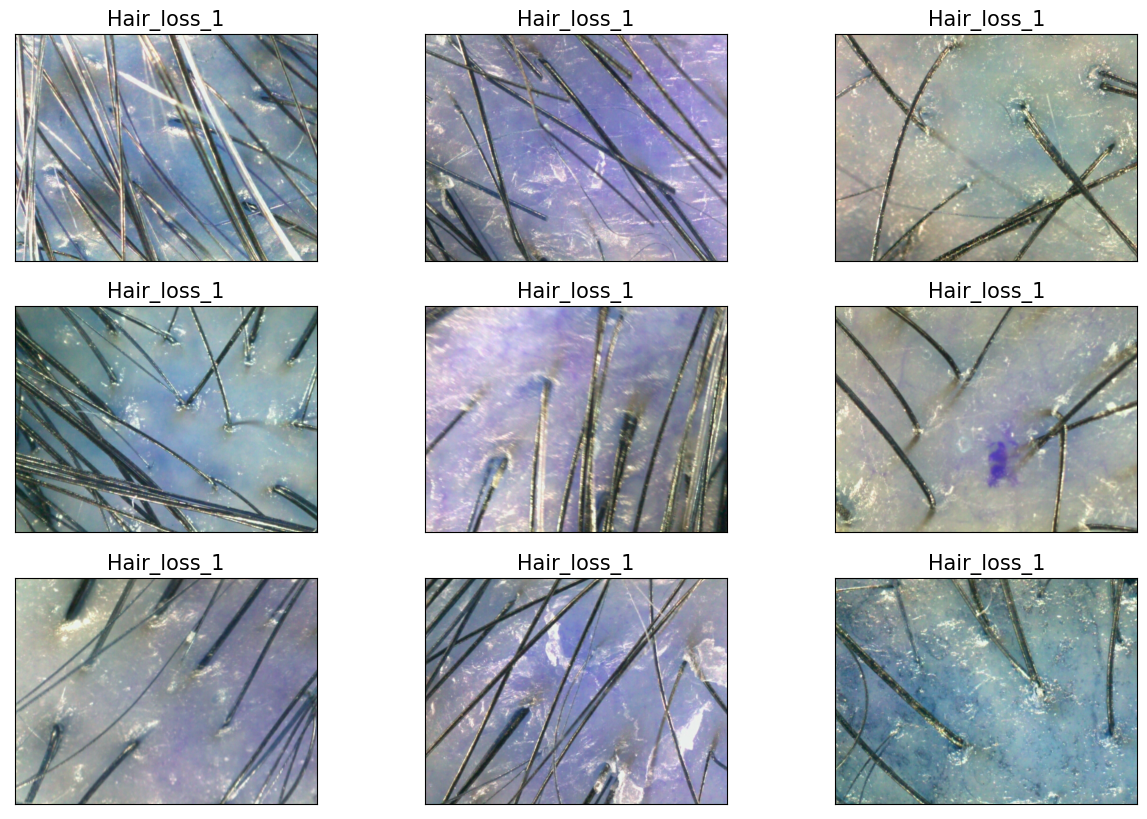

In [7]:
# 이미지 데이터 확인(test데이터)
plt.figure(figsize=(15, 10))
for i in range(9):
    random = np.random.randint(1, len(dataset))
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.imread(dataset.loc[random, "image_path"]))
    plt.title(dataset.loc[random, "scalp_type"], size=15)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [8]:
# 증상 정도별 개수 확인
print(dataset.value_counts("scalp_type"))

scalp_type
Hair_loss_1    3813
Hair_loss_2    1084
Hair_loss_3     239
Hair_loss_0     152
dtype: int64


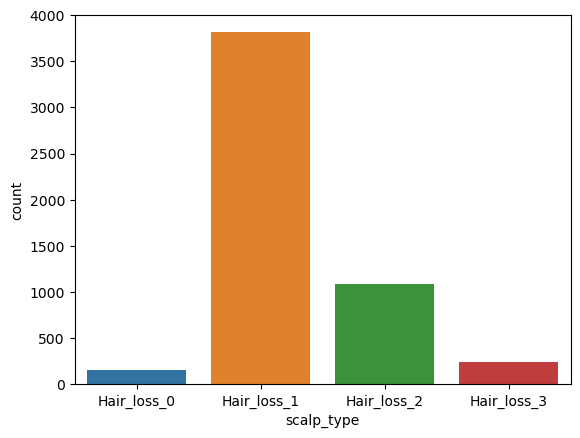

In [9]:
sns.countplot(x=dataset["scalp_type"]);

In [10]:
data = []
image_size = 150

for i in range(len(dataset)):
    img_array = cv2.imread(dataset["image_path"][i], cv2.IMREAD_GRAYSCALE)

    new_image_array = cv2.resize(img_array, (image_size, image_size))

    if dataset["scalp_type"][i] == "Hair_loss_0":
        data.append([new_image_array, 0])
    elif dataset["scalp_type"][i] == "Hair_loss_1":
        data.append([new_image_array, 1])
    elif dataset["scalp_type"][i] == "Hair_loss_2":
        data.append([new_image_array, 2])
    elif dataset["scalp_type"][i] == "Hair_loss_3":
        data.append([new_image_array, 3])

In [11]:
data

[[array([[181, 179, 178, ..., 198,  93,  67],
         [185, 181, 180, ...,  79,  66,  56],
         [179, 179, 193, ...,  55,  49,  52],
         ...,
         [184, 175, 147, ..., 194, 194, 191],
         [158, 159, 147, ..., 198, 196, 195],
         [147, 149, 146, ..., 201, 202, 199]], dtype=uint8),
  0],
 [array([[176, 175, 176, ..., 173, 182, 171],
         [180, 176, 179, ..., 177, 176, 172],
         [181, 177, 172, ..., 176, 175, 172],
         ...,
         [152, 153, 145, ..., 138, 141, 138],
         [148, 142, 142, ..., 142, 145, 149],
         [166, 143, 143, ..., 159, 170, 168]], dtype=uint8),
  0],
 [array([[149, 149, 157, ..., 190, 192, 189],
         [151, 153, 158, ..., 192, 190, 184],
         [150, 149, 167, ..., 188, 185, 181],
         ...,
         [138, 135, 134, ..., 238, 226, 238],
         [135, 134, 129, ..., 238, 239, 221],
         [132, 135, 131, ..., 233, 219, 176]], dtype=uint8),
  0],
 [array([[206, 204, 205, ..., 178, 168, 160],
         [210, 208, 2

In [ ]:
np.random.shuffle(data)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
# 간단한 학습모델
X = []
y = []

for image in data:
    X.append(image[0])
    y.append(image[1])

X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=13)

In [42]:
model = models.Sequential(
    [
        layers.Conv2D(
            32, kernel_size=(5, 5), strides=(1, 1), padding="same",
            activation="relu", input_shape=(150, 150, 1) ),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Conv2D(64, (2, 2), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(1000, activation="relu"),
        layers.Dense(4, activation="softmax")
        
    ]
)

In [43]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [44]:
hist = model.fit(X_train, y_train, epochs=5, verbose=1,
                 validation_data = (X_val, y_val))

Epoch 1/5
133/133 [==============================] - 113s 844ms/step - loss: 154.0178 - accuracy: 0.6707 - val_loss: 0.7745 - val_accuracy: 0.7155
Epoch 2/5
133/133 [==============================] - 112s 845ms/step - loss: 0.6085 - accuracy: 0.7624 - val_loss: 0.8111 - val_accuracy: 0.6966
Epoch 3/5
133/133 [==============================] - 115s 865ms/step - loss: 0.3579 - accuracy: 0.8574 - val_loss: 0.9856 - val_accuracy: 0.6767
Epoch 4/5
133/133 [==============================] - 115s 864ms/step - loss: 0.1753 - accuracy: 0.9338 - val_loss: 1.2192 - val_accuracy: 0.6909
Epoch 5/5
133/133 [==============================] - 114s 855ms/step - loss: 0.0970 - accuracy: 0.9674 - val_loss: 1.5412 - val_accuracy: 0.6890


In [76]:
import json

In [84]:
#json 파일 확인
with open("./data/scalp_type/Validation/[라벨]피지과다_3.중증/0013_A2LEBJJDE00060O_1606386172558_2_TH.json") as data_file:
    local = json.load(data_file)

print(json.dumps(local, indent="\t"))

{
	"image_id": "0013_A2LEBJJDE00060O_1606386172558_2",
	"image_file_name": "0013_A2LEBJJDE00060O_1606386172558_2_TH.jpg",
	"value_1": "0",
	"value_2": "3",
	"value_3": "2",
	"value_4": "0",
	"value_5": "1",
	"value_6": "0"
}
